In [2]:
import pandas as pd

# load the csv data sets

# Con Index = False, no guardamos el indice en el archivo resultante
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")

y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


In [3]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,84,0,0,0,0.0,0.304,21
1,9,112,82,24,0,28.2,1.282,50
2,1,139,46,19,83,28.7,0.654,22
3,0,161,50,0,0,21.9,0.254,65
4,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
609,5,139,64,35,140,28.6,0.411,26
610,1,96,122,0,0,22.4,0.207,27
611,10,101,86,37,0,45.6,1.136,38
612,0,141,0,0,0,42.4,0.205,29


I make the selectKbests

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


accs = []
percents = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for p in percents:
    k_best = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    k_best.fit(X_train, y_train)

    # Guardamos las columnas con su nombre y su dataframe
    ix = k_best.get_support()
    train_sel = pd.DataFrame(k_best.transform(X_train), columns = X_train.columns.values[ix])
    test_sel = pd.DataFrame(k_best.transform(X_test), columns = X_train.columns.values[ix])

    # Definir el clasificador
    model = DecisionTreeClassifier(random_state = 42)
    model.fit(train_sel, y_train)

    y_pred_test = model.predict(test_sel)
    acc = accuracy_score(y_test, y_pred_test)
    accs.append(acc)
    

best_acc = accs.index(max(accs)) 
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],8)}.')

print(accs)



# Guardamos el dataframe con las columnas escogidas
k_best = SelectKBest(f_classif, k = int(len(X_train.columns) * percents[best_acc]))
k_best.fit(X_train, y_train)



# Guardamos las columnas con su nombre y su dataframe
ix = k_best.get_support()
X_train_selected = pd.DataFrame(k_best.transform(X_train), columns = X_train.columns.values[ix])
X_test_selected = pd.DataFrame(k_best.transform(X_test), columns = X_train.columns.values[ix])

The best k for selection is 0.9.
The best accuracy we get is 0.75974026.
[0.7467532467532467, 0.7597402597402597, 0.7142857142857143, 0.7077922077922078, 0.6818181818181818, 0.6818181818181818]


/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

we run selectkbest again but with the columns selected

In [5]:

k_best = SelectKBest(f_classif, k = int(len(X_train.columns) * 0.9))
k_best.fit(X_train, y_train)

# Guardamos las columnas con su nombre y su dataframe
ix = k_best.get_support()
train_sel = pd.DataFrame(k_best.transform(X_train), columns = X_train.columns.values[ix])
test_sel = pd.DataFrame(k_best.transform(X_test), columns = X_train.columns.values[ix])

# Definir el clasificador
model = DecisionTreeClassifier(random_state = 42)
model.fit(train_sel, y_train)

y_pred_test = model.predict(test_sel)
acc = accuracy_score(y_test, y_pred_test)
accs.append(acc)

/home/tr4shhh/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
X_train_selected

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0
...,...,...,...,...,...,...,...
609,5.0,139.0,64.0,140.0,28.6,0.411,26.0
610,1.0,96.0,122.0,0.0,22.4,0.207,27.0
611,10.0,101.0,86.0,0.0,45.6,1.136,38.0
612,0.0,141.0,0.0,0.0,42.4,0.205,29.0


In [7]:
X_test_selected

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0
...,...,...,...,...,...,...,...
149,9.0,165.0,88.0,0.0,30.4,0.302,49.0
150,1.0,77.0,56.0,56.0,33.3,1.251,24.0
151,8.0,95.0,72.0,0.0,36.8,0.485,57.0
152,2.0,146.0,70.0,360.0,28.0,0.337,29.0


In [8]:
#Entrenamos con los datos de entrenamiento

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

we plot the tree

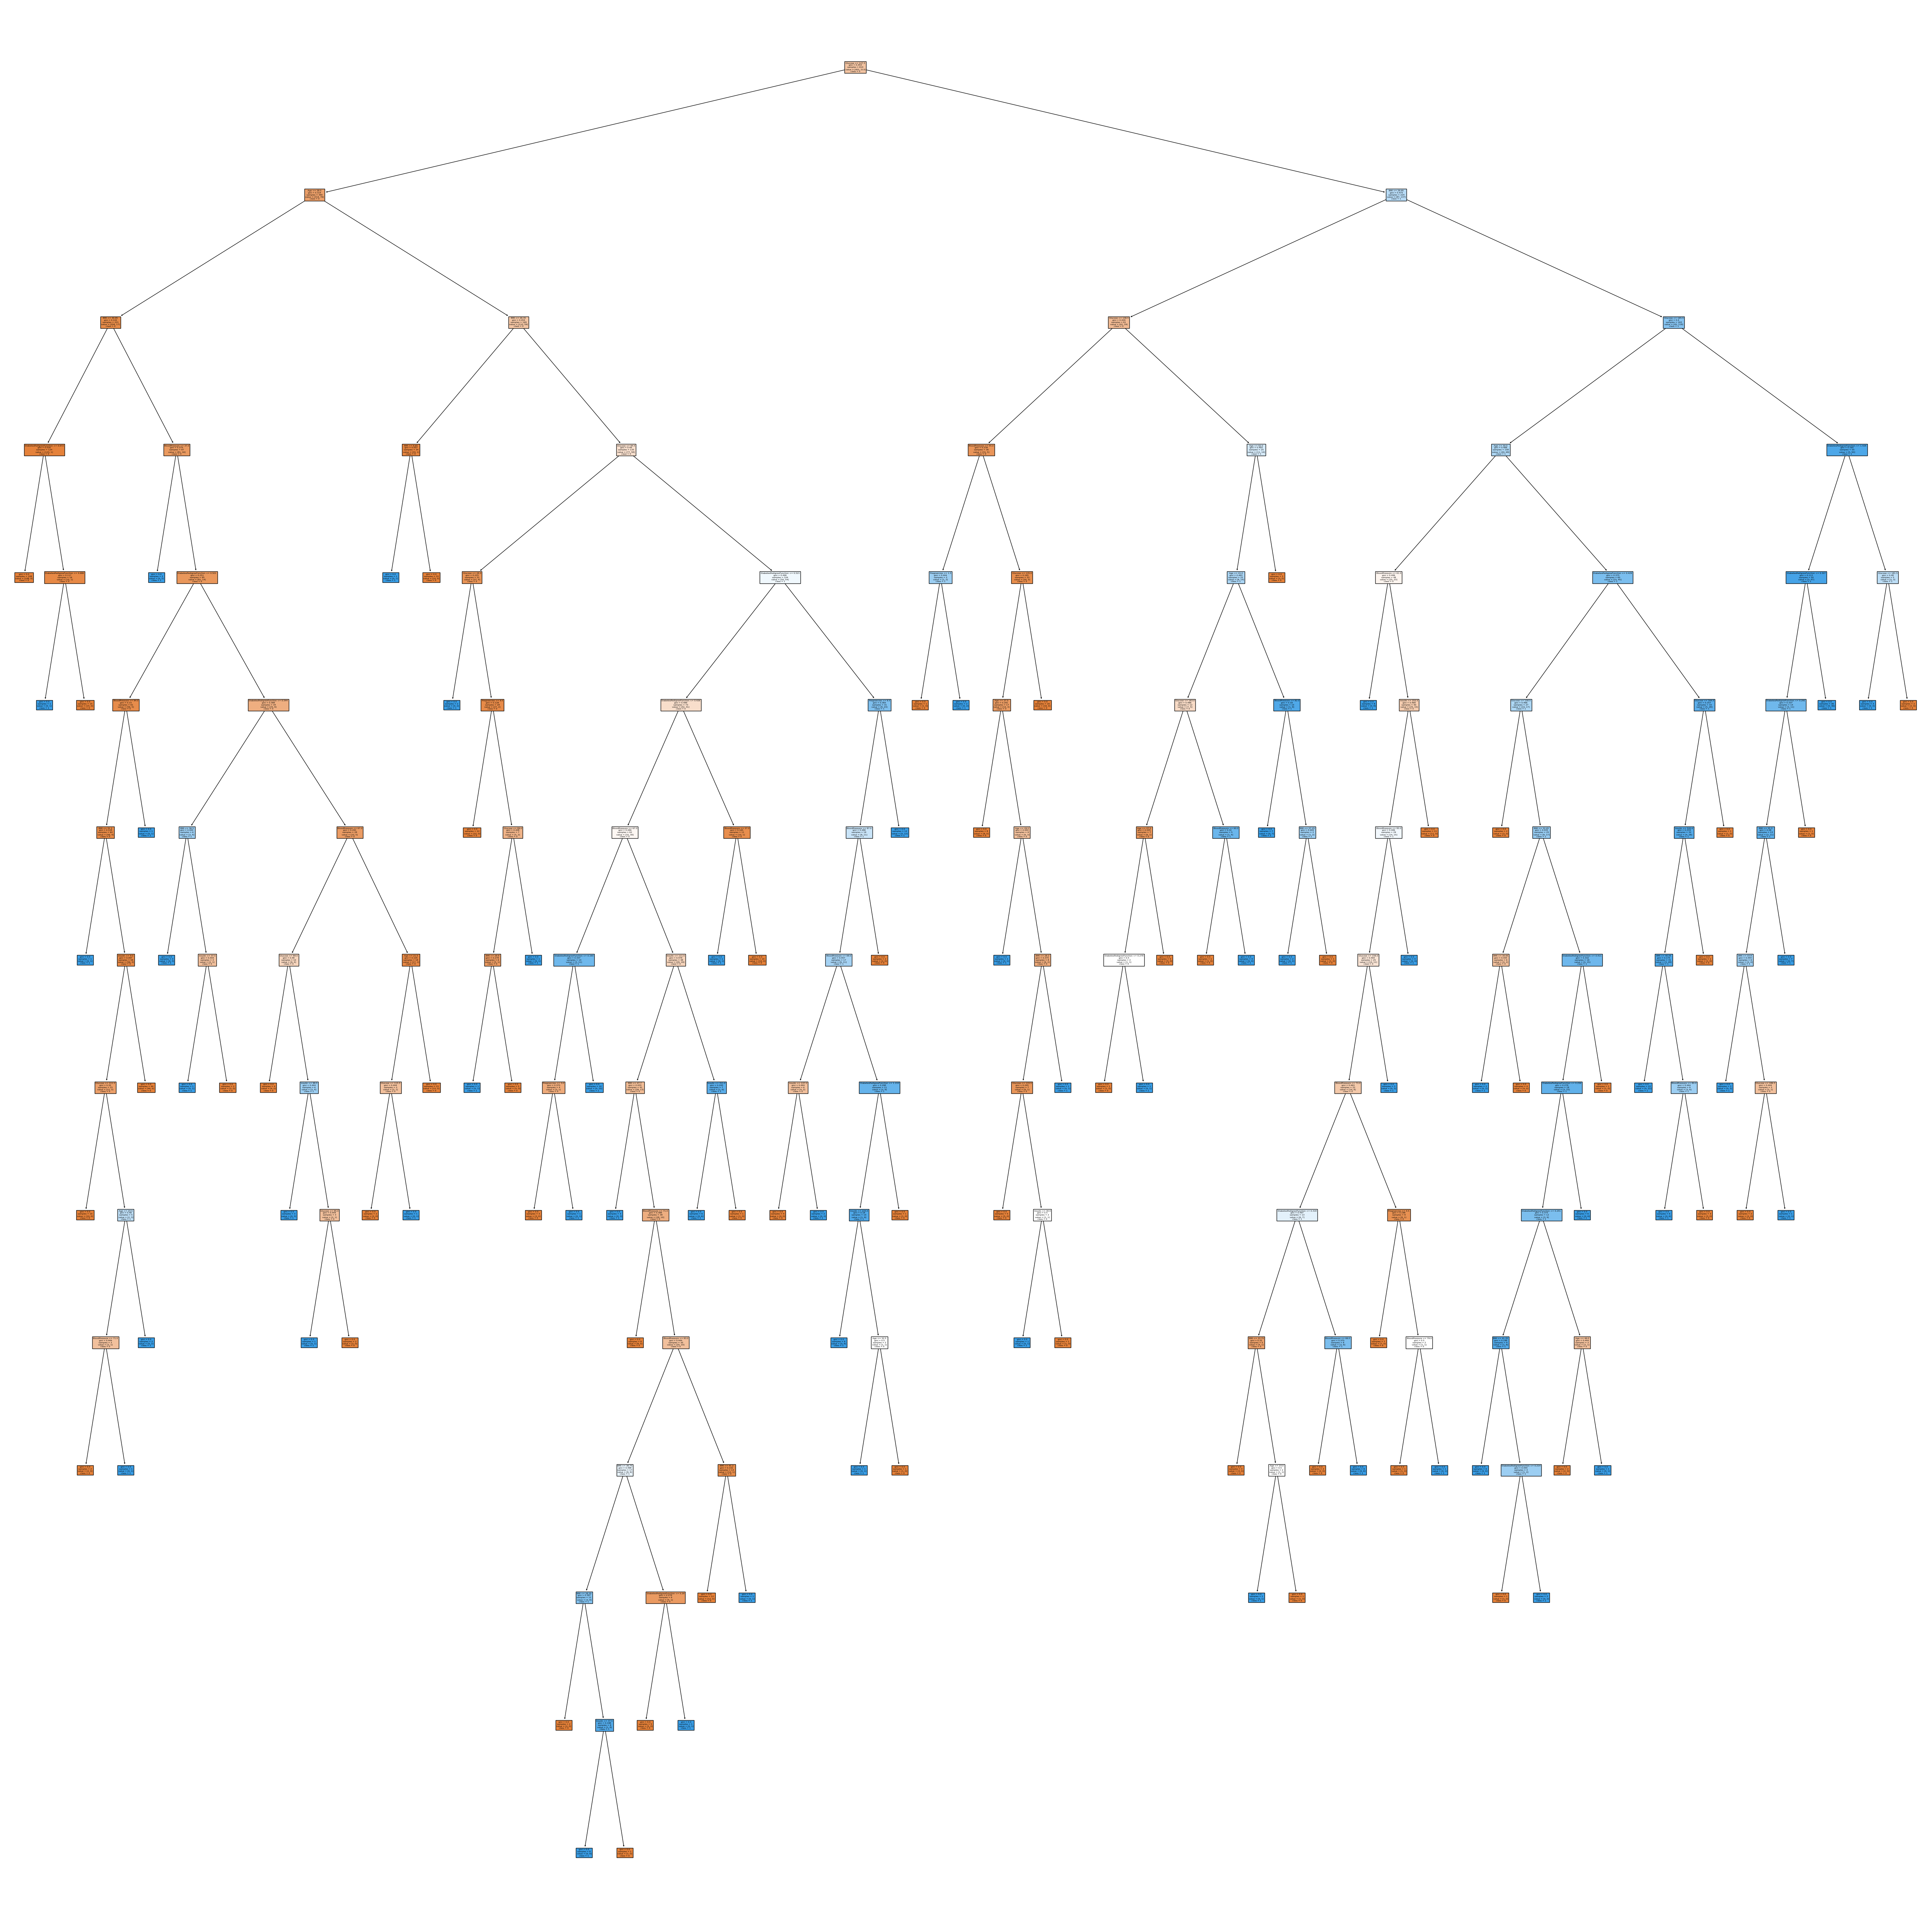

In [9]:
#Ploteamos el arbol de decision

import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(70,70))

tree.plot_tree(model, feature_names = list(X_train_selected.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [10]:
# Conseguir la prediccion del modelo
y_pred_test = model.predict(X_test_selected)
y_pred_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Conseguir la prediccion del modelo
y_pred_train = model.predict(X_train_selected)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [12]:
# Averiguar la accuracy del modelo en train

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

1.0

In [13]:
# Averiguar la accuracy del modelo en test

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.7597402597402597

In [14]:
# Obténgo la lista de parámetros válidos y sus valores actuales
params = model.get_params()
params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [15]:
import xdcodes.scrapgpt as xd

gptdriver = xd.open_driver()

/home/tr4shhh/venv/lib/python3.11/site-packages/undetected_chromedriver/__init__.py:339: UserWarning: using ChromeOptions.user_data_dir might stop working in future versions.use uc.Chrome(user_data_dir='/xyz/some/data') in case you need existing profile folder
  warnings.warn(


In [16]:
lista_params = list(params.keys())
lista_params

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [ ]:

#Optimizacion de hiperparametros
from sklearn.model_selection import GridSearchCV
import numpy as np

#Definimos los parametros a mano que queremos ajustar
hyperparams = {

'ccp_alpha': [0.1, 0.01, 0.001],                
'class_weight': [None],                         
'criterion': ['gini', 'entropy', 'log_loss'],   
'max_depth': [None, 6,7,8,9,10,11,12,13],       
'max_features': [None,'auto', 'sqrt', 'log2'],  
'max_leaf_nodes': [None, 10,20,30,40,50,60],    
'min_impurity_decrease':[0.0, 1.0 ,10.0, 100.0],
'min_samples_leaf': [1, 5,10,20,30],            
'min_samples_split': [2,4,8,16,32],                       
'min_weight_fraction_leaf': [0.0],              
'random_state': [42],                           
'splitter': ['best','random']                            

}

# Inicializamos el grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 4, n_jobs=-2)
grid


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-2,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'class_weight': [None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60],
                         'min_impurity_decrease': [0.0, 1.0, 10.0, 100.0],
                         'min_samples_leaf': [1, 5, 10, 20, 30],
                         'min_samples_split': [2, 4, 8, 16, 32],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
# Ocultamos los warnings para mantener limpio el codigo
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Entrenamos el GridSearchCV
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")


Best hyperparameters: {'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [19]:
best_parameters = {'ccp_alpha': 0.01,
'class_weight': None,
'criterion': 'entropy',
'max_depth': None,
'max_features': None,
'max_leaf_nodes': 10,
'min_impurity_decrease': 0.0,
'min_samples_leaf': 10,
'min_samples_split': 2,
'min_weight_fraction_leaf': 0.0,
'random_state': 42,
'splitter': 'best'}

In [23]:
dt_classifier = DecisionTreeClassifier(**params)
dt_classifier.fit(X_train_selected, y_train)


DecisionTreeClassifier(random_state=42)

In [29]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = dt_classifier

ruta_guardado = '../models/dt_classifier.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)

resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,...,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009307,0.001103,0.004939,0.000498,0.1,None,gini,None,None,None,...,42,best,"{'ccp_alpha': 0.1, 'class_weight': None, 'crit...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
1,0.006070,0.000275,0.005141,0.000399,0.1,None,gini,None,None,None,...,42,random,"{'ccp_alpha': 0.1, 'class_weight': None, 'crit...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
2,0.007164,0.000478,0.004468,0.000872,0.1,None,gini,None,None,None,...,42,best,"{'ccp_alpha': 0.1, 'class_weight': None, 'crit...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
3,0.005155,0.000266,0.004621,0.000491,0.1,None,gini,None,None,None,...,42,random,"{'ccp_alpha': 0.1, 'class_weight': None, 'crit...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
4,0.007287,0.001402,0.006170,0.001688,0.1,None,gini,None,None,None,...,42,best,"{'ccp_alpha': 0.1, 'class_weight': None, 'crit...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453595,0.003820,0.000117,0.004078,0.000566,0.001,None,log_loss,13,log2,60,...,42,random,"{'ccp_alpha': 0.001, 'class_weight': None, 'cr...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
453596,0.004632,0.000678,0.004349,0.000581,0.001,None,log_loss,13,log2,60,...,42,best,"{'ccp_alpha': 0.001, 'class_weight': None, 'cr...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
453597,0.004787,0.000752,0.004170,0.000420,0.001,None,log_loss,13,log2,60,...,42,random,"{'ccp_alpha': 0.001, 'class_weight': None, 'cr...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941
453598,0.004003,0.000133,0.004091,0.000354,0.001,None,log_loss,13,log2,60,...,42,best,"{'ccp_alpha': 0.001, 'class_weight': None, 'cr...",0.655844,0.649351,0.653595,0.653595,0.653096,0.002349,50941


In [25]:
y_pred_train = dt_classifier.predict(X_train_selected)

In [26]:
y_pred_test = dt_classifier.predict(X_test_selected)

Now i evaluate the model with diferents metrics

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

real = y_train
prediction = y_pred_train

# Calcular las métricas de evaluación
accuracy = accuracy_score(real, prediction)
precision = precision_score(real, prediction)
recall = recall_score(real, prediction)
f1 = f1_score(real, prediction)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.8f}')
print(f'Precision: {precision:.8f}')
print(f'Recall: {recall:.8f}')
print(f'F1 Score: {f1:.8f}')


Accuracy: 1.00000000
Precision: 1.00000000
Recall: 1.00000000
F1 Score: 1.00000000


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

real = y_test
prediction = y_pred_test

# Calcular las métricas de evaluación
accuracy = accuracy_score(real, prediction)
precision = precision_score(real, prediction)
recall = recall_score(real, prediction)
f1 = f1_score(real, prediction)

# Mostrar los resultados
print(f'Accuracy: {accuracy:.8f}')
print(f'Precision: {precision:.8f}')
print(f'Recall: {recall:.8f}')
print(f'F1 Score: {f1:.8f}')


Accuracy: 0.75974026
Precision: 0.64062500
Recall: 0.74545455
F1 Score: 0.68907563


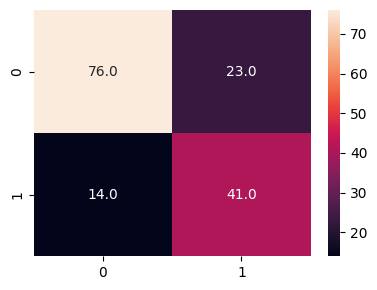

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

real = y_test
prediction = y_pred_test


matrix_cm = confusion_matrix(real, prediction)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(matrix_cm)

plt.figure(figsize = (4, 3))
sns.heatmap(cm_df, annot=True, fmt=".1f", cbar=True)

plt.tight_layout()

plt.show()

in this proyect we learned:

- To develop a decision tree model
- study its hyperparameters to see how it can be improved
- And graph the tree to see how its branches are composed.